This is a small code, which shows how each optimiser performs and it's loss reduction in subsequent steps. <br><br>

We have considered the following optimisers - <br>
1) GD -----------------> Vanila **G**radient **D**escent <br>
2) Mini-Batch -----> **Mini-Batch** Gradient Descent <br>
3) Momentum ----> Gradient Descent with **Momentum** or **Momentum** based Gradient Descent <br>
4) NAG ---------------> **N**estrov **A**ccelerated **G**radient Descent <br>
5) AdaGrad --------> **Ada**ptive **Grad**ients <br>
6) RMSProp -------> **R**oot **M**ean **S**quared **Prop**ogation <br>
7) Adam -------------> **Ada**ptive **M**oment Estimation <br><br>

We have performed the optimisers on neural networks

# Import Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

# Data Prepration

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [0]:
randomState = 0
np.random.seed(0)

In [4]:
data1, labels1 = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=randomState)
print(data1.shape, labels1.shape)

(1000, 2) (1000,)


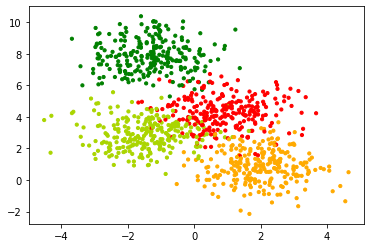

In [5]:
plt.scatter(data1[:,0], data1[:,1], c=labels1, cmap=my_cmap, s=10)
plt.show()

In [6]:
X_train, X_validate, Y_train, Y_validate = train_test_split(data1, labels1, stratify=labels1, random_state=randomState)
print(Y_train.shape, Y_validate.shape)

(750,) (250,)


In [7]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_validate = enc.fit_transform(np.expand_dims(Y_validate,1)).toarray()
print(Y_OH_train.shape, Y_OH_validate.shape)

(750, 4) (250, 4)


In [8]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

[[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
[[ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


# Compressed Class

In [0]:
class FeedForwardNeuralNetwork_with_algorithms_compressed :
 def __init__(self,w1,w2):self.params,self.gradients,self.updates,self.updates_prev,self.num_layers={'W1':w1.copy(),'W2':w2.copy(),'B1':np.zeros((1,2)),'B2':np.zeros((1,4))},{},{'W_hist1':0,'W_hist2':0,'B_hist1':0,'B_hist2':0,'W_mmtm1':0,'W_mmtm2':0,'B_mmtm1':0,'B_mmtm2':0},{'W_hist1':0,'W_hist2':0,'B_hist1':0,'B_hist2':0},2                
 def sigmoid(self,X):return(1.0/(1.+np.exp(-X)))
 def grad_sigmoid(self,X):return(X*(1-X))
 def softmax(self,X):return(np.exp(X)/np.sum(np.exp(X),axis=1).reshape(-1,1))
 def grad_all(self,X,Y,params=None):self.gradients['dW2'],self.gradients['dB2'],self.gradients['dW1'],self.gradients['dB1']=(np.matmul(self.sigmoid(np.matmul(X,params['W1'])+params['B1']).T,(self.softmax(np.matmul((self.sigmoid((np.matmul(X,params['W1'])+params['B1']))),params['W2'])+params['B2'])-Y)),np.sum((self.softmax(np.matmul((self.sigmoid((np.matmul(X,params['W1'])+params['B1']))),params['W2'])+params['B2'])-Y),axis=0).reshape(1,-1),np.matmul(X.T,(np.multiply((np.matmul((self.softmax(np.matmul((self.sigmoid((np.matmul(X,params['W1'])+params['B1']))),params['W2'])+params['B2'])-Y),params['W2'].T)),self.grad_sigmoid(self.sigmoid(np.matmul(X,params['W1'])+params['B1']))))),np.sum((np.multiply((np.matmul((self.softmax(np.matmul((self.sigmoid((np.matmul(X,params['W1'])+params['B1']))),params['W2'])+params['B2'])-Y),params['W2'].T)),self.grad_sigmoid(self.sigmoid(np.matmul(X,params['W1'])+params['B1'])))),axis=0).reshape(1,-1)) if params is not None else (np.matmul(self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1']).T,(self.softmax(np.matmul((self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1'])),self.params['W2'])+self.params['B2'])-Y)),np.sum((self.softmax(np.matmul((self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1'])),self.params['W2'])+self.params['B2'])-Y),axis=0).reshape(1,-1),np.matmul(X.T,(np.multiply((np.matmul((self.softmax(np.matmul((self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1'])),self.params['W2'])+self.params['B2'])-Y),self.params['W2'].T)),self.grad_sigmoid(self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1']))))),np.sum((np.multiply((np.matmul((self.softmax(np.matmul((self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1'])),self.params['W2'])+self.params['B2'])-Y),self.params['W2'].T)),self.grad_sigmoid(self.sigmoid(np.matmul(X,self.params['W1'])+self.params['B1'])))),axis=0).reshape(1,-1))
 def fit( self, X_train, Y_train, optimiser, epochs=1, learning_rate=1, momentum=0.9, memory=0.9, batch_size=128, plot_loss=False) :
  eps, loss = (1e-8, {}) if plot_loss else (1e-8,0)
  for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
   if optimiser.lower()=='gd' or optimiser.lower()=='gradientdescent' or optimiser.lower()=='gradient descent' : 
    self.grad_all(X_train,Y_train)
    self.params['W2'],self.params['W1'],self.params['B2'],self.params['B1']=(self.params['W2']-learning_rate*self.gradients['dW2']/X_train.shape[0],self.params['W1']-learning_rate*self.gradients['dW1']/X_train.shape[0],self.params['B2']-learning_rate*self.gradients['dB2']/X_train.shape[0],self.params['B1']-learning_rate*self.gradients['dB1']/X_train.shape[0])
   elif optimiser.lower()=='mini-batch' or optimiser.lower()=='minibatch' or optimiser.lower()=='mini batch' :
    for k in range(0,X_train.shape[0]+1,batch_size):
     self.grad_all(X_train[k:k+batch_size], Y_train[k:k+batch_size])
     for i in range(1,self.num_layers+1):self.params["W"+str(i)],self.params["B"+str(i)]=self.params["W"+str(i)]-learning_rate*(self.gradients["dW"+str(i)]/batch_size),self.params["B"+str(i)]-learning_rate*(self.gradients["dB"+str(i)]/batch_size)
   elif optimiser.lower()=='momentum' or optimiser.lower()=='momentum based gradient descent' or optimiser.lower()=='mgd' :
    self.grad_all(X_train, Y_train)
    for i in range(1, self.num_layers+1) :
     self.updates['W_hist'+str(i)],self.updates['B_hist'+str(i)] = self.updates['W_hist'+str(i)]*momentum+learning_rate*(self.gradients['dW'+str(i)]/X_train.shape[0]),self.updates['B_hist'+str(i)]*momentum+learning_rate*(self.gradients['dB'+str(i)]/X_train.shape[0])
     self.params['W'+str(i)],self.params['B'+str(i)] = self.params['W'+str(i)]-self.updates['W_hist'+str(i)],self.params['B'+str(i)]-self.updates['B_hist'+str(i)]
   elif optimiser.lower()=='nag' or optimiser.lower()=='nesterov accelerated gradient descent' :
    temp_params = {}
    for i in range(1, self.num_layers+1) :
     self.updates['W_hist'+str(i)],self.updates['B_hist'+str(i)] = self.updates_prev['W_hist'+str(i)]*momentum,self.updates_prev['B_hist'+str(i)]*momentum
     temp_params["W"+str(i)],temp_params["B"+str(i)] = self.params["W"+str(i)]-self.updates["W_hist"+str(i)],self.params["B"+str(i)]-self.updates["B_hist"+str(i)]
    self.grad_all(X_train, Y_train, params=temp_params)
    for i in range(1, self.num_layers+1) :
     self.params['W'+str(i)],self.params['B'+str(i)] = self.params['W'+str(i)]-learning_rate*(self.updates['W_hist'+str(i)]*momentum+learning_rate*(self.gradients['dW'+str(i)]/X_train.shape[0])),self.params['B'+str(i)]-learning_rate*(self.updates['B_hist'+str(i)]*momentum+learning_rate*(self.gradients['dB'+str(i)]/X_train.shape[0]))
     self.updates['W_hist'+str(i)],self.updates['B_hist'+str(i)] = self.updates['W_hist'+str(i)]*momentum+learning_rate*(self.gradients['dW'+str(i)]/X_train.shape[0]),self.updates['B_hist'+str(i)]*momentum+learning_rate*(self.gradients['dB'+str(i)]/X_train.shape[0])
    self.updates_prev = self.updates
   elif optimiser.lower()=='adagrad' or optimiser.lower()=='adaptive gradient' :
    self.grad_all(X_train, Y_train)
    for i in range (1, self.num_layers+1) :
     self.updates['W_hist'+str(i)],self.updates['B_hist'+str(i)] = self.updates['W_hist'+str(i)]+((self.gradients['dW'+str(i)]/X_train.shape[0])**2),self.updates['B_hist'+str(i)]+((self.gradients['dB'+str(i)]/X_train.shape[0])**2)
     self.params['W'+str(i)],self.params['B'+str(i)] = self.params['W'+str(i)]-(learning_rate/(np.sqrt(self.updates['W_hist'+str(i)])+eps))*(self.gradients['dW'+str(i)]/X_train.shape[0]),self.params['B'+str(i)]-(learning_rate/(np.sqrt(self.updates['B_hist'+str(i)])+eps))*(self.gradients['dB'+str(i)]/X_train.shape[0])
   elif optimiser.lower()=='rmsprop' or optimiser.lower()=='root mean squared propogation' :
    self.grad_all(X_train, Y_train)
    for i in range (1, self.num_layers+1) :
     self.updates['W_hist'+str(i)],self.updates['B_hist'+str(i)] = memory*self.updates['W_hist'+str(i)]+(1-memory)*((self.gradients['dW'+str(i)]/X_train.shape[0])**2),memory*self.updates['B_hist'+str(i)] + (1-memory)*((self.gradients['dB'+str(i)]/X_train.shape[0])**2)
     self.params['W'+str(i)],self.params['B'+str(i)] = self.params['W'+str(i)]-(learning_rate/(np.sqrt(self.updates['W_hist'+str(i)]+eps)))*(self.gradients['dW'+str(i)]/X_train.shape[0]),self.params['B'+str(i)]-(learning_rate/(np.sqrt(self.updates['B_hist'+str(i)]+eps))) * (self.gradients['dB'+str(i)]/X_train.shape[0])
   elif optimiser.lower()=='adam' or optimiser.lower()=='adaptive moment estimation' :
    num_updates=0
    self.grad_all(X_train,Y_train)
    for i in range(1,self.num_layers+1) :
     self.updates['W_mmtm'+str(i)],self.updates['B_mmtm'+str(i)],num_updates = momentum*self.updates['W_mmtm'+str(i)]+(1-momentum)*(self.gradients['dW'+str(i)]/X_train.shape[0]),momentum*self.updates['B_mmtm'+str(i)]+(1-momentum)*(self.gradients['dB'+str(i)]/X_train.shape[0]),num_updates+1
     self.updates['W_hist'+str(i)],self.updates['B_hist'+str(i)] = memory*self.updates['W_hist'+str(i)] + (1-memory)*((self.gradients['dW'+str(i)]/X_train.shape[0])**2),memory*self.updates['B_hist'+str(i)]+(1-memory)*((self.gradients['dB'+str(i)]/X_train.shape[0])**2)
     self.params['W'+str(i)],self.params['B'+str(i)]=self.params['W'+str(i)]-(learning_rate/(np.sqrt(self.updates['W_hist'+str(i)]/(1-np.power(memory,num_updates))+eps)))*self.updates['W_mmtm'+str(i)]/(1-np.power(momentum,num_updates)),self.params['B'+str(i)]-(learning_rate/(np.sqrt(self.updates['B_hist'+str(i)]/(1-np.power(memory,num_updates))+eps)))*self.updates['B_mmtm'+str(i)]/(1-np.power(momentum,num_updates))
   else : print('Incorrect optimiser')  
   if plot_loss:loss[epoch]=log_loss(np.argmax(Y_train,axis=1),self.softmax(np.matmul((self.sigmoid(np.matmul(X_train,self.params['W1'])+self.params['B1'])),self.params['W2'])+self.params['B2']))   
  if plot_loss :
   plt.figure(figsize=(10,5))
   plt.plot(list(loss.values()),'-o',markersize=5)
   plt.xlabel('Epochs')
   plt.ylabel('Log Loss')
   print('Least Log-Loss achieved = ', list(loss.values())[-1])
   plt.show()
 def predict(self,X_validate):return np.array(self.softmax(np.matmul((self.sigmoid((np.matmul(X_validate,self.params['W1'])+self.params['B1']))),self.params['W2'])+self.params['B2'])).squeeze()

# Comparing different Optimisers

In [0]:
Epochs = 100
Learning_Rate = 1
Memory = 0.9
Momentum = 0.5
Batch_Size = 64


Least Log-Loss achieved =  0.7280707769548532


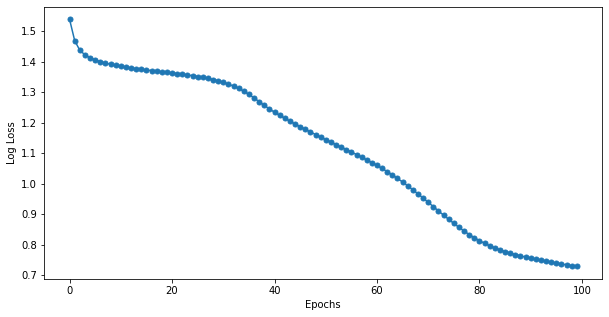

Accuracy =  71.6 %
CPU times: user 365 ms, sys: 6.64 ms, total: 372 ms
Wall time: 380 ms


In [11]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='GD', epochs=Epochs, learning_rate=Learning_Rate, plot_loss=True)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')


Least Log-Loss achieved =  1.076128252533249


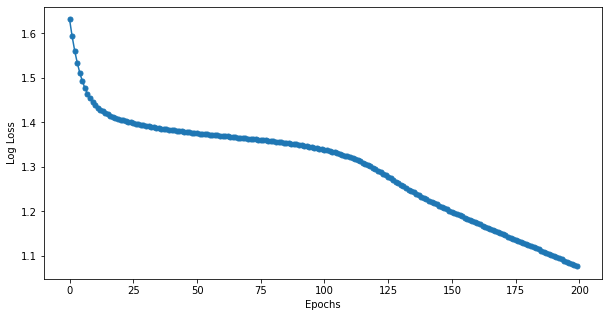

Accuracy =  55.60000000000001 %
CPU times: user 656 ms, sys: 6.08 ms, total: 662 ms
Wall time: 700 ms


In [39]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='Mini-Batch', epochs=Epochs, learning_rate=Learning_Rate, batch_size=Batch_Size, plot_loss=True)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')


Least Log-Loss achieved =  0.5481804180671872


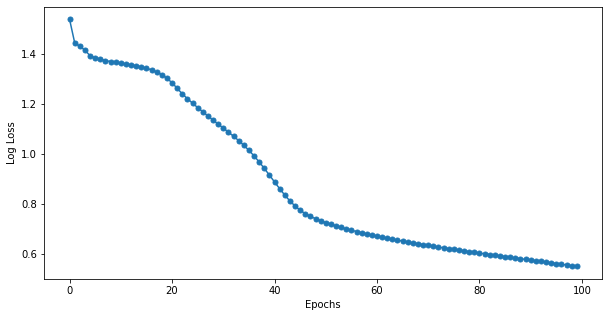

Accuracy =  85.2 %
CPU times: user 370 ms, sys: 6.85 ms, total: 377 ms
Wall time: 379 ms


In [13]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='Momentum', epochs=Epochs, learning_rate=Learning_Rate, momentum=Momentum, plot_loss=True)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')


Least Log-Loss achieved =  0.6613582151720873


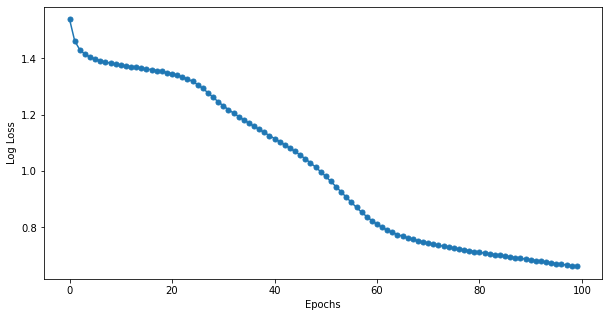

Accuracy =  72.8 %
CPU times: user 348 ms, sys: 7.16 ms, total: 355 ms
Wall time: 369 ms


In [14]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='NAG', epochs=Epochs, learning_rate=Learning_Rate, momentum=Momentum, plot_loss=1)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')


Least Log-Loss achieved =  0.3330039119172038


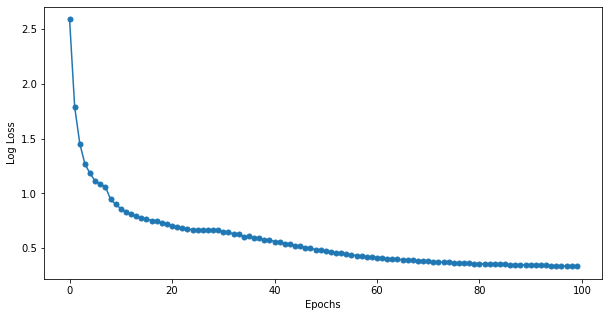

Accuracy =  90.4 %
CPU times: user 362 ms, sys: 8.14 ms, total: 370 ms
Wall time: 375 ms


In [15]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='AdaGrad', epochs=Epochs, learning_rate=Learning_Rate, plot_loss=True)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')


Least Log-Loss achieved =  0.4277376095440496


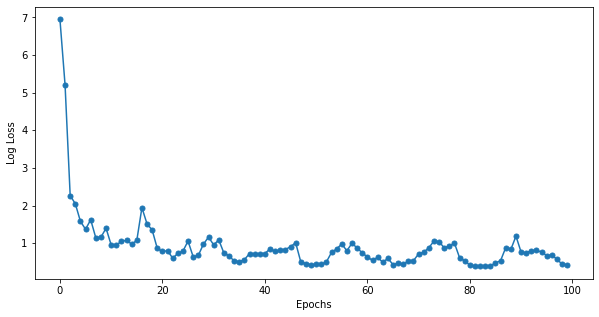

Accuracy =  85.2 %
CPU times: user 364 ms, sys: 8.97 ms, total: 373 ms
Wall time: 382 ms


In [16]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='RMSProp', epochs=Epochs, learning_rate=Learning_Rate, memory=Memory, plot_loss=True)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')


Least Log-Loss achieved =  0.4909966452438351


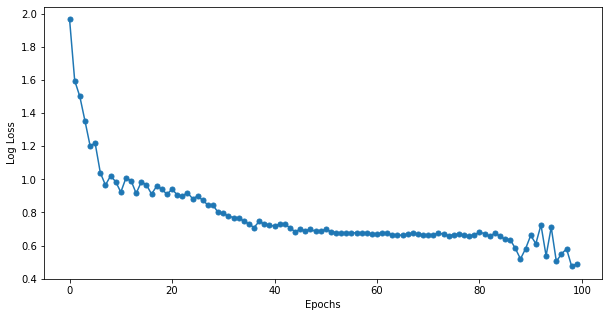

Accuracy =  82.39999999999999 %
CPU times: user 393 ms, sys: 7.77 ms, total: 401 ms
Wall time: 401 ms


In [17]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser='Adam', epochs=Epochs, learning_rate=Learning_Rate, memory=Memory, plot_loss=True)
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

# Applying best parameters on different Optimisation Algorithms to get best accuracy

### GD - Vanila Gradient Descent

In [0]:
Optimiser = 'GD'
Epochs = 10000
Learning_Rate = 0.5


Least Log-Loss achieved =  0.19054044862775077


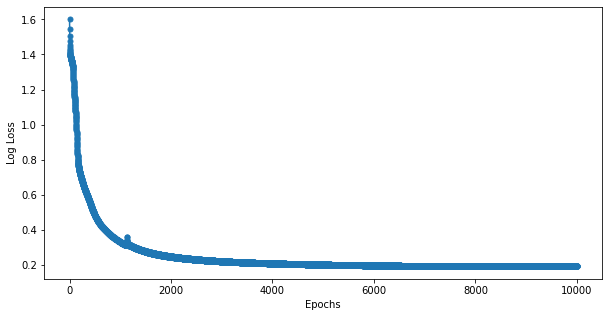

CPU times: user 22.9 s, sys: 100 ms, total: 23 s
Wall time: 23 s


In [13]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, plot_loss=True)

In [20]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  93.60000000000001 %


### Mini-Batch

In [0]:
Optimiser = 'MiniBatch'
Epochs = 800
Learning_Rate = 1
Batch_Size = 256


Least Log-Loss achieved =  0.21434849556941277


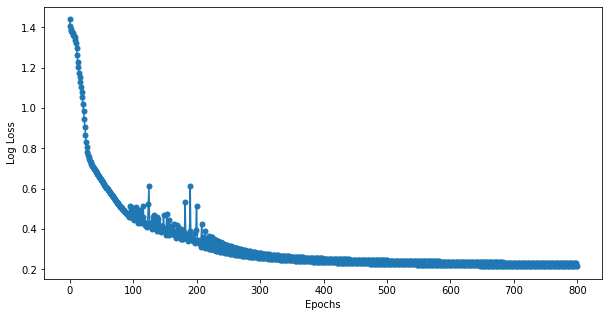

CPU times: user 2.05 s, sys: 11.9 ms, total: 2.06 s
Wall time: 2.07 s


In [22]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, batch_size=Batch_Size, plot_loss=True)

In [23]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.39999999999999 %


### Momentum

In [0]:
Optimiser = 'Momentum'
Epochs = 1000
Learning_Rate = 0.5
Momentum = 0.8


Least Log-Loss achieved =  0.19165209587913765


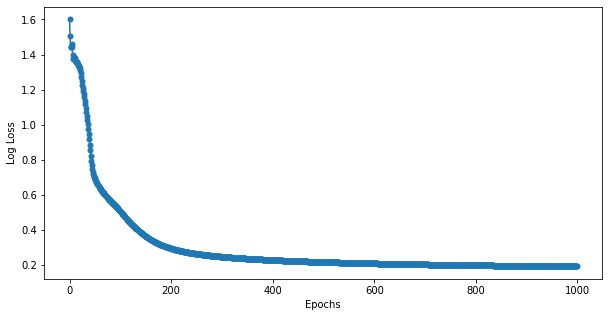

CPU times: user 2.19 s, sys: 10 ms, total: 2.2 s
Wall time: 2.21 s


In [25]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, momentum=Momentum, plot_loss=True)

In [26]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.8 %


### NAG

In [0]:
Optimiser = 'NAG'
Epochs = 1000
Learning_Rate = 0.5
Momentum = 0.9


Least Log-Loss achieved =  0.21663426547451825


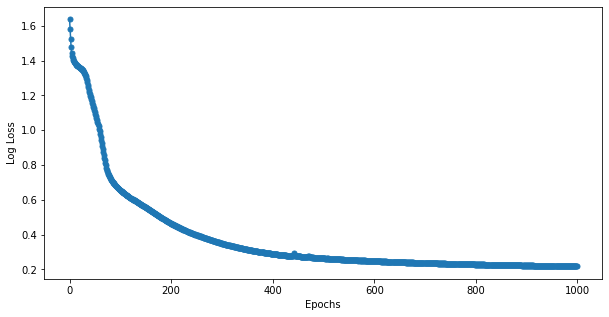

CPU times: user 2.18 s, sys: 16.9 ms, total: 2.2 s
Wall time: 2.22 s


In [28]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, momentum=Momentum, plot_loss=1)

In [29]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.0 %


### AdaGrad

In [0]:
Optimiser = 'AdaGrad'
Epochs = 500
Learning_Rate = 0.8


Least Log-Loss achieved =  0.22941964544211213


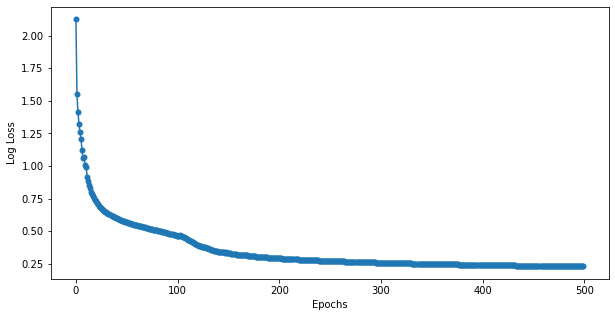

CPU times: user 1.15 s, sys: 9.87 ms, total: 1.16 s
Wall time: 1.18 s


In [31]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, plot_loss=True)

In [32]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.0 %


### RMSProp

In [0]:
Optimiser = 'RMSProp'
Epochs = 2000
Learning_Rate = 0.005
Memory = 0.9


Least Log-Loss achieved =  0.2012688999897069


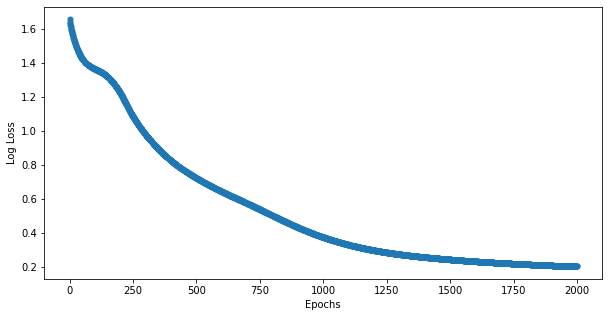

CPU times: user 4.27 s, sys: 25.1 ms, total: 4.3 s
Wall time: 4.31 s


In [34]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, memory=Memory, plot_loss=True)

In [35]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.39999999999999 %


### Adam

In [0]:
Optimiser = 'Adam'
Epochs = 200
Learning_Rate = 0.1
Memory = 0.9


Least Log-Loss achieved =  0.16884426322711243


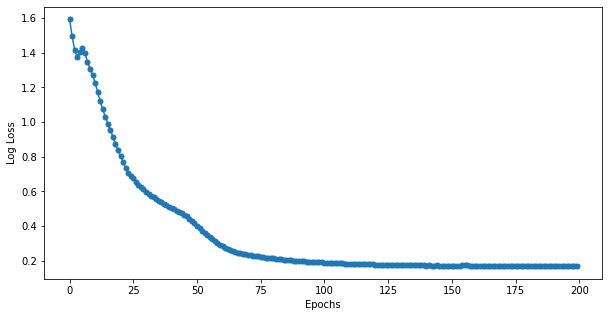

CPU times: user 686 ms, sys: 9.06 ms, total: 695 ms
Wall time: 702 ms


In [37]:
%%time
ffnn_comp = FeedForwardNeuralNetwork_with_algorithms_compressed(W1, W2)
ffnn_comp.fit(X_train, Y_OH_train, optimiser=Optimiser, epochs=Epochs, learning_rate=Learning_Rate, memory=Memory, plot_loss=True)

In [38]:
Y_pred_comp = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_comp,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  95.19999999999999 %
